In [ ]:
%pip install pandas
%pip install numpy
%pip install scipy
%pip install matplotlib


[notice] A new release of pip is available: 24.2 -> 25.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 24.2 -> 25.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [91]:
ind_utilization = pd.read_csv("../data/Industrial-capacity-utilization-rates/16100109.csv")

In [92]:
ind_utilization = ind_utilization[['GEO', 'North American Industry Classification System (NAICS)', 'REF_DATE', 'VALUE']]

ind_utilization


,GEO,North American Industry Classification System (NAICS),REF_DATE,VALUE
0,Canada,Total industrial,1987-01,81.1
1,Canada,Forestry and logging [113],1987-01,68.5
2,Canada,Mining and oil and gas extraction [21],1987-01,77.9
3,Canada,Oil and gas extraction [211],1987-01,83.2
4,Canada,Mining,1987-01,70.4
...,...,...,...,...
5231,Canada,Computer and electronic product manufacturing ...,2025-04,87.5
5232,Canada,"Electrical equipment, appliance and component ...",2025-04,79.8
5233,Canada,Transportation equipment manufacturing [336],2025-04,84.3
5234,Canada,Furniture and related product manufacturing [337],2025-04,72.3


In [93]:
ind_utilization['REF_DATE'] = pd.to_datetime(ind_utilization['REF_DATE'])

In [94]:
ind_utilization["Quarter"] = ind_utilization["REF_DATE"].dt.quarter
ind_utilization["Year"] = ind_utilization["REF_DATE"].dt.year

In [95]:
only_canada_mask = ind_utilization['GEO'].eq('Canada')
# not_current_mask = ~ind_utilization['Year'].isin([2025,2024])

ind_utilization_median = ind_utilization[(only_canada_mask)]
ind_utilization_median = ind_utilization_median.reset_index(drop=True)

ind_utilization_median

,GEO,North American Industry Classification System (NAICS),REF_DATE,VALUE,Quarter,Year
0,Canada,Total industrial,1987-01-01,81.1,1,1987
1,Canada,Forestry and logging [113],1987-01-01,68.5,1,1987
2,Canada,Mining and oil and gas extraction [21],1987-01-01,77.9,1,1987
3,Canada,Oil and gas extraction [211],1987-01-01,83.2,1,1987
4,Canada,Mining,1987-01-01,70.4,1,1987
...,...,...,...,...,...,...
5231,Canada,Computer and electronic product manufacturing ...,2025-04-01,87.5,2,2025
5232,Canada,"Electrical equipment, appliance and component ...",2025-04-01,79.8,2,2025
5233,Canada,Transportation equipment manufacturing [336],2025-04-01,84.3,2,2025
5234,Canada,Furniture and related product manufacturing [337],2025-04-01,72.3,2,2025


In [96]:
ind_utilization_median["VALUE"].shift(1, fill_value=0)
ind_utilization_median['Prev_Value'] = ind_utilization_median.groupby(['Quarter', 'North American Industry Classification System (NAICS)'])['VALUE'].shift(periods=1, fill_value=0)
ind_utilization_median['Difference by Quarter'] = np.where(ind_utilization_median['Prev_Value'] != 0, ind_utilization_median['VALUE'] - ind_utilization_median['Prev_Value'], 0)

ind_utilization_median

,GEO,North American Industry Classification System (NAICS),REF_DATE,VALUE,Quarter,Year,Prev_Value,Difference by Quarter
0,Canada,Total industrial,1987-01-01,81.1,1,1987,0.0,0.0
1,Canada,Forestry and logging [113],1987-01-01,68.5,1,1987,0.0,0.0
2,Canada,Mining and oil and gas extraction [21],1987-01-01,77.9,1,1987,0.0,0.0
3,Canada,Oil and gas extraction [211],1987-01-01,83.2,1,1987,0.0,0.0
4,Canada,Mining,1987-01-01,70.4,1,1987,0.0,0.0
...,...,...,...,...,...,...,...,...
5231,Canada,Computer and electronic product manufacturing ...,2025-04-01,87.5,2,2025,82.0,5.5
5232,Canada,"Electrical equipment, appliance and component ...",2025-04-01,79.8,2,2025,80.1,-0.3
5233,Canada,Transportation equipment manufacturing [336],2025-04-01,84.3,2,2025,81.7,2.6
5234,Canada,Furniture and related product manufacturing [337],2025-04-01,72.3,2,2025,75.8,-3.5


In [97]:
ind_utilization_median['Median by Quarter'] = ind_utilization_median.groupby(['Quarter','North American Industry Classification System (NAICS)'])['VALUE'].transform('median')
ind_utilization_median['Median Change by Quarter'] = ind_utilization_median.groupby(['Quarter','North American Industry Classification System (NAICS)'])['Difference by Quarter'].transform('median')

ind_utilization_median

,GEO,North American Industry Classification System (NAICS),REF_DATE,VALUE,Quarter,Year,Prev_Value,Difference by Quarter,Median by Quarter,Median Change by Quarter
0,Canada,Total industrial,1987-01-01,81.1,1,1987,0.0,0.0,81.1,0.2
1,Canada,Forestry and logging [113],1987-01-01,68.5,1,1987,0.0,0.0,81.8,-1.3
2,Canada,Mining and oil and gas extraction [21],1987-01-01,77.9,1,1987,0.0,0.0,77.9,0.2
3,Canada,Oil and gas extraction [211],1987-01-01,83.2,1,1987,0.0,0.0,78.5,0.0
4,Canada,Mining,1987-01-01,70.4,1,1987,0.0,0.0,73.7,0.5
...,...,...,...,...,...,...,...,...,...,...
5231,Canada,Computer and electronic product manufacturing ...,2025-04-01,87.5,2,2025,82.0,5.5,80.4,0.0
5232,Canada,"Electrical equipment, appliance and component ...",2025-04-01,79.8,2,2025,80.1,-0.3,78.0,0.0
5233,Canada,Transportation equipment manufacturing [336],2025-04-01,84.3,2,2025,81.7,2.6,84.3,0.6
5234,Canada,Furniture and related product manufacturing [337],2025-04-01,72.3,2,2025,75.8,-3.5,78.9,0.0


In [98]:
ind_utilization_median = ind_utilization_median.drop(['Prev_Value'], axis=1)

In [99]:
ind_utilization_median['temp'] = abs(ind_utilization_median['VALUE'] - ind_utilization_median['Median by Quarter'])

ind_utilization_median['MAD by Quarter'] = ind_utilization_median.groupby(['Quarter','North American Industry Classification System (NAICS)'])['temp'].transform('median')

ind_utilization_median = ind_utilization_median.drop(['temp'], axis=1)

In [100]:
k = 2.5 # MAD threshold multiplier
ind_utilization_median['Lower Bound'] = ind_utilization_median['Median by Quarter'] - k * ind_utilization_median['MAD by Quarter']
ind_utilization_median['Upper Bound'] = ind_utilization_median['Median by Quarter'] + k * ind_utilization_median['MAD by Quarter']

ind_utilization_median['ZScore'] = (ind_utilization_median["VALUE"] - ind_utilization_median["Median by Quarter"]) / ind_utilization_median['MAD by Quarter']

In [101]:
def find_how_unusual(zscore):
    if (zscore > 3):
        return "Very Unusual"
    elif (zscore > 2):
        return "Unusual"
    else:
        return "Normal"
# ind_utilization_median['Unusual'] = (ind_utilization_median["VALUE"] < ind_utilization_median["lower_bound"]) | (ind_utilization_median["VALUE"] > ind_utilization_median["upper_bound"])
# ind_utilization_median = ind_utilization_median.drop(['lower_bound','upper_bound'], axis=1)

In [102]:
ind_utilization_median['Normality'] = ind_utilization_median['ZScore'].apply(find_how_unusual)

ind_utilization_median

,GEO,North American Industry Classification System (NAICS),REF_DATE,VALUE,Quarter,Year,Difference by Quarter,Median by Quarter,Median Change by Quarter,MAD by Quarter,Lower Bound,Upper Bound,ZScore,Normality
0,Canada,Total industrial,1987-01-01,81.1,1,1987,0.0,81.1,0.2,2.3,75.35,86.85,0.000000,Normal
1,Canada,Forestry and logging [113],1987-01-01,68.5,1,1987,0.0,81.8,-1.3,4.7,70.05,93.55,-2.829787,Normal
2,Canada,Mining and oil and gas extraction [21],1987-01-01,77.9,1,1987,0.0,77.9,0.2,4.5,66.65,89.15,0.000000,Normal
3,Canada,Oil and gas extraction [211],1987-01-01,83.2,1,1987,0.0,78.5,0.0,4.7,66.75,90.25,1.000000,Normal
4,Canada,Mining,1987-01-01,70.4,1,1987,0.0,73.7,0.5,5.1,60.95,86.45,-0.647059,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5231,Canada,Computer and electronic product manufacturing ...,2025-04-01,87.5,2,2025,5.5,80.4,0.0,5.9,65.65,95.15,1.203390,Normal
5232,Canada,"Electrical equipment, appliance and component ...",2025-04-01,79.8,2,2025,-0.3,78.0,0.0,3.0,70.50,85.50,0.600000,Normal
5233,Canada,Transportation equipment manufacturing [336],2025-04-01,84.3,2,2025,2.6,84.3,0.6,4.3,73.55,95.05,0.000000,Normal
5234,Canada,Furniture and related product manufacturing [337],2025-04-01,72.3,2,2025,-3.5,78.9,0.0,2.9,71.65,86.15,-2.275862,Normal


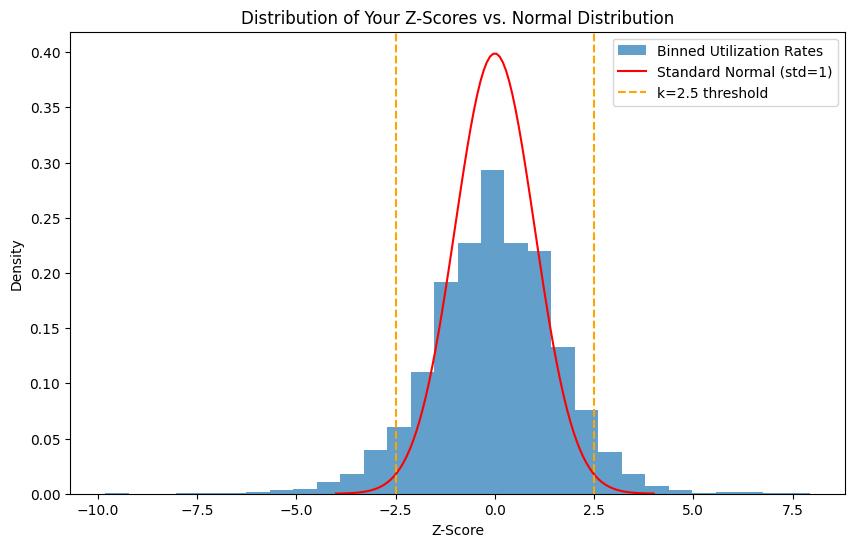

In [105]:
plt.figure(figsize=(10, 6))
plt.hist(ind_utilization_median['ZScore'].dropna(), bins=30, density=True, alpha=0.7, label='Binned Utilization Rates')

# Overlay a standard normal curve for comparison
x = np.linspace(-4, 4, 100)
plt.plot(x, stats.norm.pdf(x, 0, 1), 'r-', label='Standard Normal (std=1)')
plt.axvline(x=2.5, color='orange', linestyle='--', label='k=2.5 threshold')
plt.axvline(x=-2.5, color='orange', linestyle='--')
plt.xlabel('Z-Score')
plt.ylabel('Density')
plt.legend()
plt.title('Distribution of Your Z-Scores vs. Normal Distribution')
plt.show()

Histogram peak is shorter than the Standard Normal line, shouldn't use smaller k value.

In [103]:
ind_utilization_median.to_csv('../data/Evaluate_Change_in_Utilization_Rates_All.csv',index=True)